# 0 - PRELIMINARIES

In [32]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

%matplotlib inline

In [33]:
# open existing database
conn = sqlite3.connect('../source_data/profiles.sqlite')
c = conn.cursor()

In [34]:
#make sure connection works
c.execute('SELECT * FROM HOS_PROFILE')
col_name_list = [tup[0] for tup in c.description]
print "Column Names: "
print col_name_list

Column Names: 
['CASE_ID', 'AGEGRP', 'RACE', 'GENDER', 'MRSTAT', 'EDUC', 'BMI', 'GENHTH', 'MODACT', 'CLMBSV', 'PACMPL', 'PLMTKW', 'EACMPL', 'ENTCRF', 'PNINTF', 'PCEFUL', 'ENERGY', 'BLSAD', 'SCLACT', 'ASHLTH', 'ASEHLTH', 'DIFBTH', 'DIFDRS', 'DIFEAT', 'DIFCHR', 'DIFWLK', 'DIFTOL', 'PHYHTH', 'MENHTH', 'PORHTH', 'CPNEXR', 'CPNRST', 'SOBFLT', 'SOBSIT', 'SOBWLK', 'SOBSTR', 'NMBFET', 'TINGFT', 'DECSNS', 'DECHEL', 'ARTHPN', 'RDNEWP', 'HRMOST', 'HIGHBP', 'ANGCAD', 'CHF', 'AMI', 'OTHHRT', 'STROKE', 'COPD_E', 'GI_ETC', 'ATHHIP', 'ATHHAN', 'OSTEOPO', 'SCIATC', 'DIABET', 'ANYCAN', 'COLNCA', 'LUNGCA', 'BRSTCA', 'PROSCA', 'BACKPN', 'FELTSD', 'DEPMCH', 'DEP2YR', 'DEPWK', 'CMPHTH', 'SMKFRQ', 'URNLKG', 'URNMAG', 'URNDOC', 'URNTRT', 'PAOTLK', 'PAOADV', 'BALTLK', 'FELL12MO', 'BAL12MO', 'FALLTLK', 'OSTTEST', 'WHOCMP', 'SRVDSP', 'RNDNUM', 'PCTCMP', 'COHORT', 'PLREG', 'SVLANG']


Contains a total of 86 fields and 322,794 beneficiary records.  Surveys were completed in 2011.

In [35]:
#Work preliminarily with smaller sample
profiles = pd.read_sql('SELECT * FROM HOS_PROFILE', conn)
profiles.head(3)

# close connection
conn.close()

# 1 - DATA INSPECTION

*Look for general patterns in data spread*

In [36]:
profiles.describe()

,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,MODACT,CLMBSV,PACMPL,...,PAOADV,BALTLK,FELL12MO,BAL12MO,FALLTLK,OSTTEST,WHOCMP,PCTCMP,PLREG,SVLANG
count,321395.000000,277182.000000,309332.000000,287137.000000,285429.000000,279425.000000,301758.000000,297968.000000,290213.000000,296261.000000,...,277933.000000,286112.000000,289119.000000,287874.000000,281694.000000,284631.000000,309317.000000,321395.000000,321395.000000,321395.000000
mean,2.189206,1.272305,1.574868,1.489690,2.169916,1.327243,3.080167,2.142834,2.005306,2.521864,...,1.497217,1.800239,1.739906,1.620164,1.690739,1.518921,1.150939,89.928305,5.405513,1.052406
std,0.676462,0.593488,0.494364,0.499895,0.790121,0.469208,1.043330,0.801484,0.811007,1.342689,...,0.499993,0.475849,0.438686,0.485347,0.545616,0.499643,0.441904,25.641803,2.613859,0.255839
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.400000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,97.300000,4.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,98.600000,5.000000,1.000000
75%,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,8.000000,1.000000
max,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,5.000000,3.000000,3.000000,5.000000,...,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,4.000000,100.000000,10.000000,4.000000


*Checking for profile (survey) completeness*

In [37]:
profiles['PCTCMP'].describe()

count    321395.000000
mean         89.928305
std          25.641803
min           1.400000
25%          97.300000
50%          98.600000
75%         100.000000
max         100.000000
Name: PCTCMP, dtype: float64

In [ ]:
profiles.count().plot(kind='bar', figsize=(14, 2.5))

# 2 - EXPLORE

In [38]:
profiles.columns

Index([u'CASE_ID', u'AGEGRP', u'RACE', u'GENDER', u'MRSTAT', u'EDUC', u'BMI', u'GENHTH', u'MODACT', u'CLMBSV', u'PACMPL', u'PLMTKW', u'EACMPL', u'ENTCRF', u'PNINTF', u'PCEFUL', u'ENERGY', u'BLSAD', u'SCLACT', u'ASHLTH', u'ASEHLTH', u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL', u'PHYHTH', u'MENHTH', u'PORHTH', u'CPNEXR', u'CPNRST', u'SOBFLT', u'SOBSIT', u'SOBWLK', u'SOBSTR', u'NMBFET', u'TINGFT', u'DECSNS', u'DECHEL', u'ARTHPN', u'RDNEWP', u'HRMOST', u'HIGHBP', u'ANGCAD', u'CHF', u'AMI', u'OTHHRT', u'STROKE', u'COPD_E', u'GI_ETC', u'ATHHIP', u'ATHHAN', u'OSTEOPO', u'SCIATC', u'DIABET', u'ANYCAN', u'COLNCA', u'LUNGCA', u'BRSTCA', u'PROSCA', u'BACKPN', u'FELTSD', u'DEPMCH', u'DEP2YR', u'DEPWK', u'CMPHTH', u'SMKFRQ', u'URNLKG', u'URNMAG', u'URNDOC', u'URNTRT', u'PAOTLK', u'PAOADV', u'BALTLK', u'FELL12MO', u'BAL12MO', u'FALLTLK', u'OSTTEST', u'WHOCMP', u'SRVDSP', u'RNDNUM', u'PCTCMP', u'COHORT', u'PLREG', u'SVLANG'], dtype='object')

Start simple.  Take each demographic variable and make a continuous variable for Multiple Chronic Conditions.

In [39]:
profiles['MCC'] = (profiles[['HIGHBP', 'ANGCAD', 'CHF', 'AMI', 'OTHHRT', 'STROKE', 'COPD_E', 'GI_ETC', 'ATHHIP', 'ATHHAN', 'OSTEOPO', 'SCIATC', 'DIABET', 'ANYCAN']] == 1).sum(axis=1)
profiles['ADL'] = (profiles[[u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL']] > 1).sum(axis=1)

In [40]:
profiles_simple = profiles[['AGEGRP', 'RACE', 'GENDER', 'MRSTAT', 'EDUC', 'BMI', 'GENHTH', 'PLREG', 'ADL' , 'MCC' ]].set_index(profiles['CASE_ID'])

# # replace a column name
profiles_simple.rename(columns = {'PLREG' : 'REGION', 'DEPWK': 'DEP'}, inplace = True)

In [41]:
profiles_simple.head()

,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,REGION,ADL,MCC
CASE_ID,,,,,,,,,,
C01000060,3,NaN,2,1,1,1,4,8,2,5
C01000074,3,NaN,2,2,1,2,2,8,0,6
C01000140,3,1,1,1,2,1,3,4,1,3
C01000540,3,1,2,1,3,1,2,7,2,3
C01000573,3,1,1,2,1,1,4,10,1,1


In [42]:
profiles_simple = profiles_simple.dropna()
profiles_simple.head()

,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,REGION,ADL,MCC
CASE_ID,,,,,,,,,,
C01000140,3,1,1,1,2,1,3,4,1,3
C01000540,3,1,2,1,3,1,2,7,2,3
C01000573,3,1,1,2,1,1,4,10,1,1
C01001114,3,1,2,2,2,2,2,5,1,0
C01001527,3,1,1,1,2,1,3,3,5,7


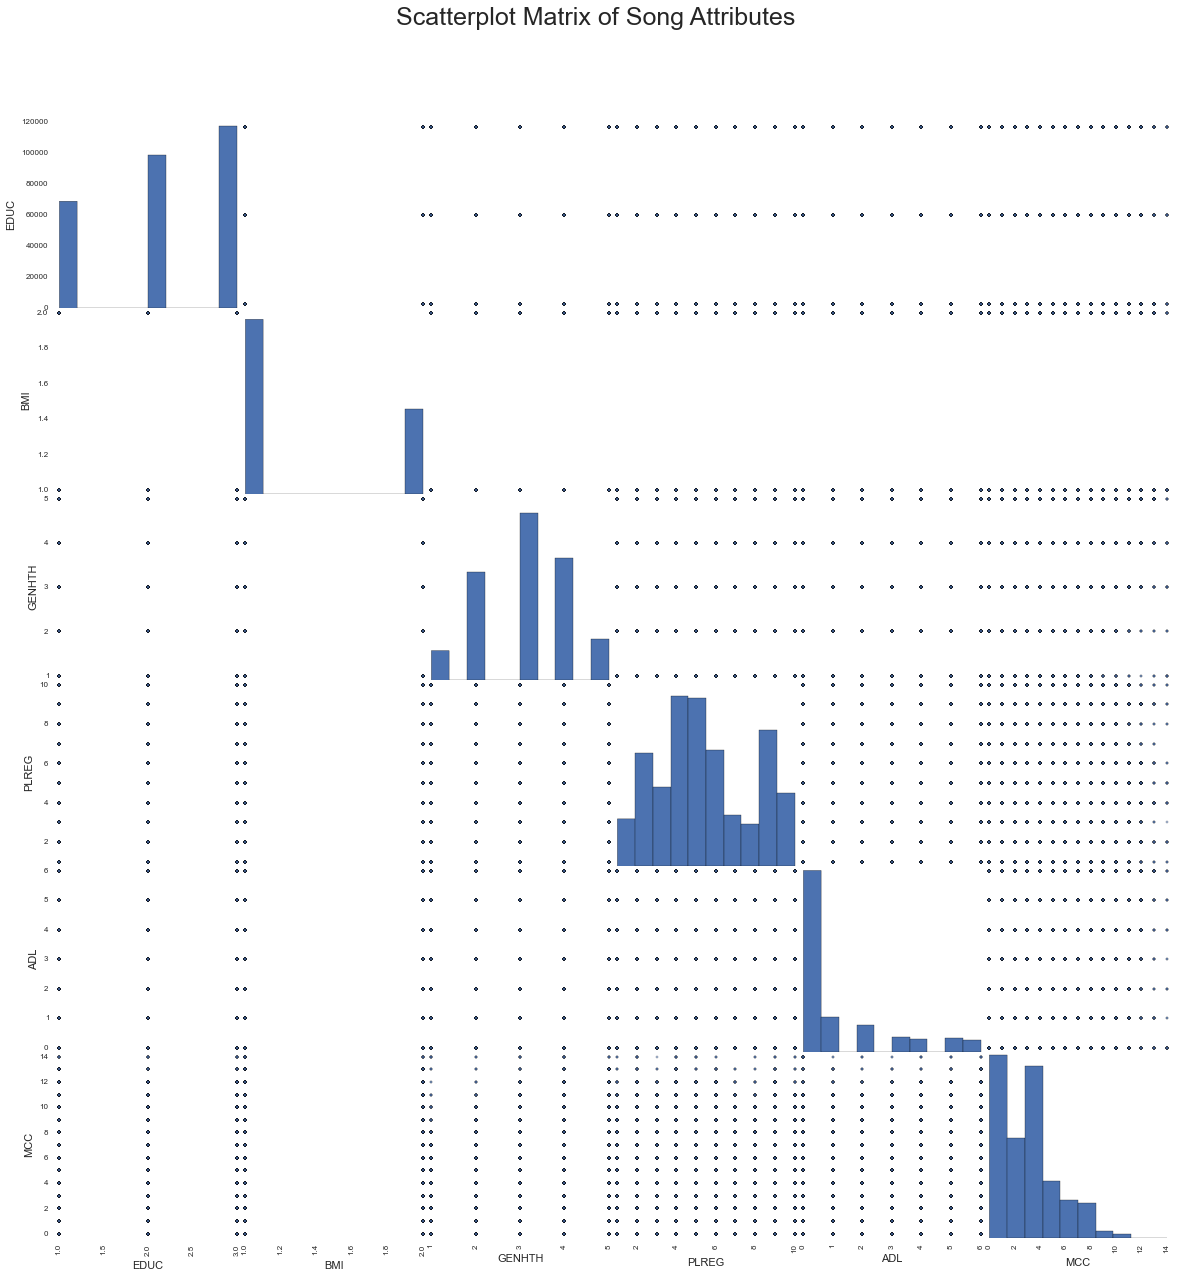

In [31]:
pd.scatter_matrix(profiles[['EDUC', 'BMI', 'GENHTH', 'PLREG', 'ADL' , 'MCC']],figsize=(20,20))
plt.suptitle('Scatterplot Matrix of Song Attributes',size=25)

*Distribution of Data Points*

In [ ]:
#download the data, unzip, transform into pandas object
allpatients = pd.read_csv(url='www.hosonline.org/surveys/hos/download/C16B_PUF.zip')